In [1]:
from senolysis_analysis import *
from joblib import Parallel,delayed
from time import strftime,localtime

# img_paths = find_images('/Users/robertwelch/Desktop/Test Images/Chiara3')
# print(f'Number of images: {len(img_paths)}')

# program_start_time = strftime("%Y-%m-%d %H-%M-%S", localtime())
#marked = senolysis_analysis(img_paths[0],program_start_time)
# for img_path in img_paths:
#     senolysis_analysis(img_path,program_start_time)


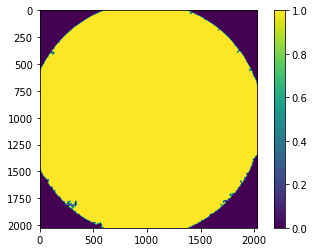

In [12]:
red,green,blue = nd2_import('/Users/robertwelch/Desktop/Test Images/Chiara3/New images/WellB02_Channel Kinetix Single band tdTomato, Kinetix Single band senolysis  EGFP1, Kinetix Single  Hoechst_Seq0000.nd2')

blue = normalize_img(blue,high_per=90)
blue_down = downscale_local_mean(blue,factors=(4,4))
red = normalize_img(red,high_per=99)
red_down = downscale_local_mean(red,factors=(4,4))

mask = remove_well_rings(blue_down)
#mask = threshold_with_otsu(blue_removed)
#plt.imshow(blue)
plt.imshow(mask)
plt.colorbar()

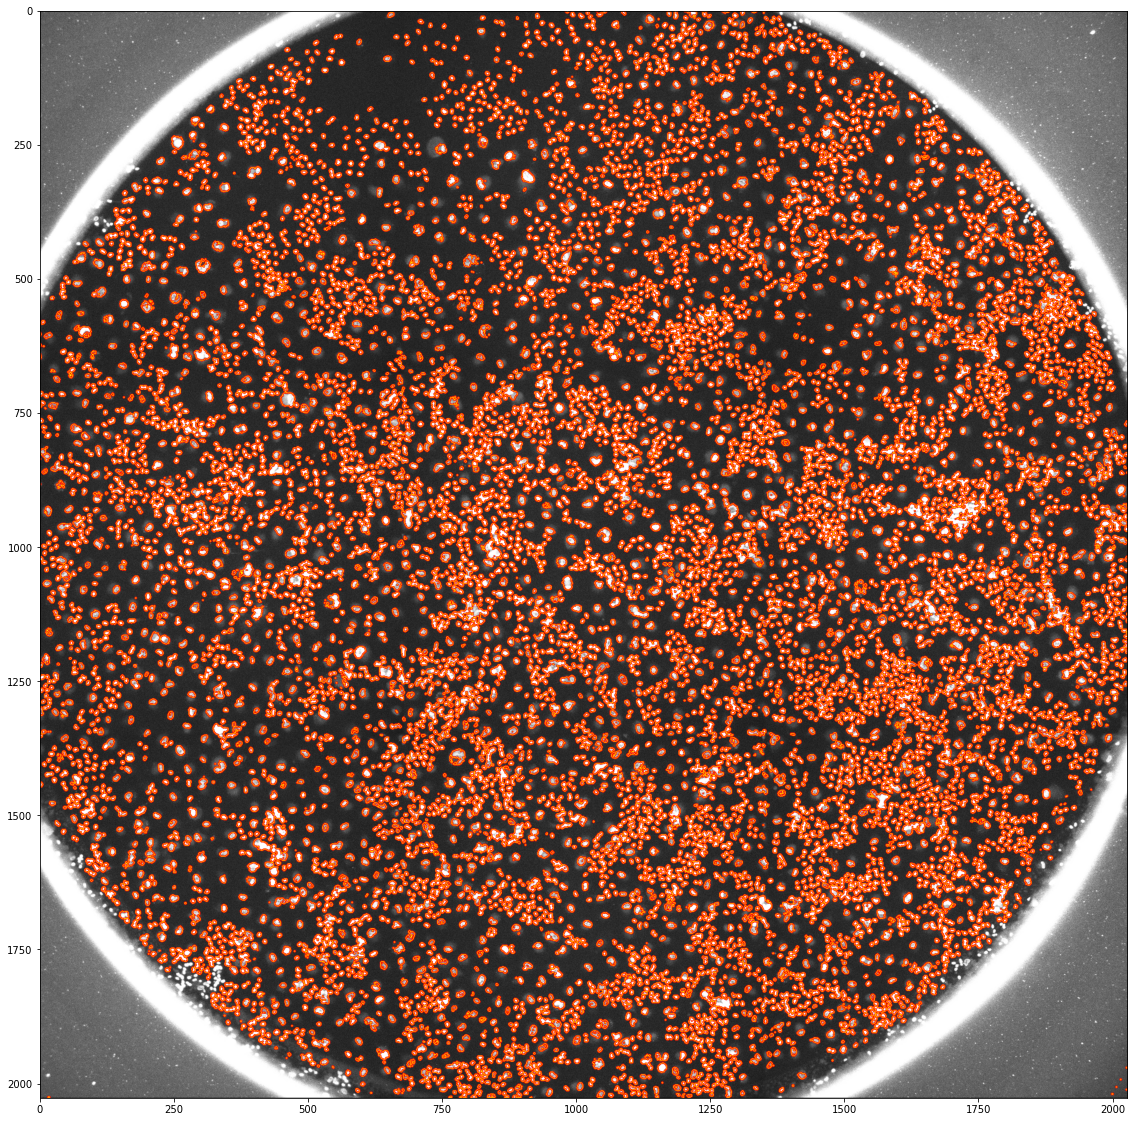

In [38]:
marked = mark_boundaries(blue_down,mask,outline_color=(1,0,0))
plt.figure(figsize = (20,20))
plt.imshow(marked)

In [27]:
from cellpose import models

model = models.Cellpose(gpu=False, model_type="nuclei", net_avg=False,)

red,green,blue = nd2_import('/Users/robertwelch/Desktop/Test Images/Chiara3/New images/WellB02_Channel Kinetix Single band tdTomato, Kinetix Single band senolysis  EGFP1, Kinetix Single  Hoechst_Seq0000.nd2')

blue = normalize_img(blue,high_per=90)
blue_down = downscale_local_mean(blue,factors=(10,10))
blue_removed = remove_well_rings(blue_down)


In [32]:
 mask, _, _, _ = model.eval(
        blue_removed,
        batch_size=6,
        diameter=4,
        flow_threshold=0,
    )

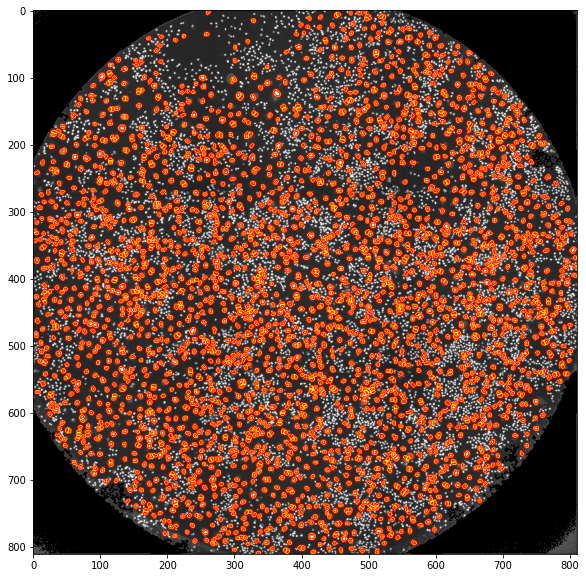

In [34]:
marked = mark_boundaries(blue_removed,mask,outline_color=(1,0,0))
plt.figure(figsize = (10,10))
plt.imshow(marked)